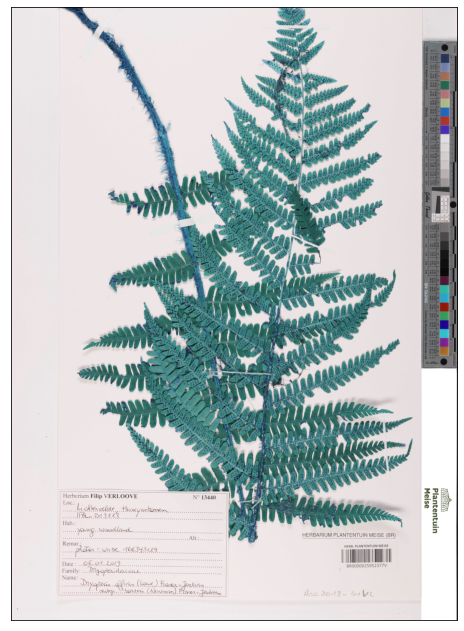

In [38]:
import cv2
from skimage.exposure import histogram
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.filters import rank
from skimage.morphology import disk, remove_small_objects
from skimage.util import img_as_ubyte
import numpy as np

file_path = "data/full_images/http___oxalis.br.fgov.be_images_V_BR0_000_025_952_377_BR0000025952377V.jpg"

# be_images_V_BR0_000_025_412_536_BR0000025412536V
# http___oxalis.br.fgov.be_images_V_BR0_000_025_952_377_BR0000025952377V.jpg"

def plot_mat(mat):
    plt.figure(figsize=(8,12))
    plt.imshow(mat)
    plt.xticks([]), plt.yticks([])
    plt.show()

image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

plot_mat(image)

Resized Dimensions :  (4038, 2938, 3)


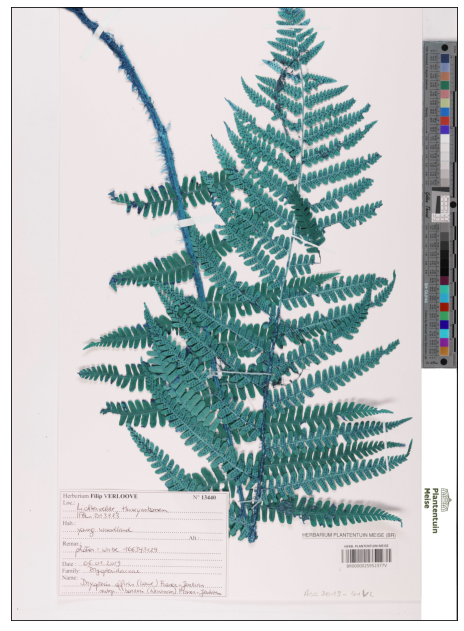

In [39]:
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
#resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

print('Resized Dimensions : ',resized.shape)
plot_mat(resized)

In [40]:
'''image = img_as_ubyte(resized)
denoised = rank.median(resized, disk(1))

markers = rank.gradient(image, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(1))

labels = segmentation.watershed(gradient, markers)'''

'image = img_as_ubyte(resized)\ndenoised = rank.median(resized, disk(1))\n\nmarkers = rank.gradient(image, disk(5)) < 10\nmarkers = ndi.label(markers)[0]\n\n# local gradient (disk(2) is used to keep edges thin)\ngradient = rank.gradient(denoised, disk(1))\n\nlabels = segmentation.watershed(gradient, markers)'

In [41]:
#gradient

In [42]:
#plot_mat(gradient)

In [ ]:
segments = segmentation.slic(image, compactness=5, n_segments=10, start_label=1, convert2lab=True)
#out1 = color.label2rgb(segments, resized, kind='avg', bg_label=0)

In [ ]:
plot_mat(segmentation.mark_boundaries(resized, segments, color=(255,0,0)))

In [ ]:
segments